https://stepik.org/lesson/1370118/step/10

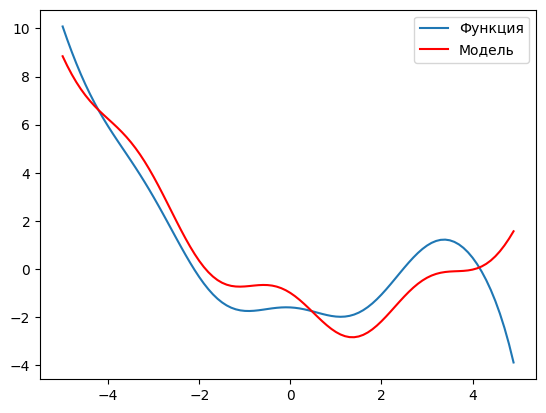

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

func = lambda x: .5 * x**2 - .1 * 1 / np.exp(-x) + .5 * np.cos(2*x) - 2.
a = lambda x: w[0] + w[1] * x + w[2] * x**2 + w[3] * np.cos(2*x) + w[4] * np.sin(2*x)
loss = lambda x, y: (a(x) - y)**2
def dL(x, y):
    err = a(x) - y
    return np.array([
        2 * err,                  # Производная по w[0] (свободный член)
        2 * err * x,              # # Производная по w[1] (линейный член)
        2 * err * x**2,           # Производная по w[2] (квадратный член)
        2 * err * np.cos(2*x),    # Производная по w[3] (косинусный член)
        2 * err * np.sin(2*x)     # Производная по w[4] (синусный член)
    ])

# Данные
coord_x = np.arange(-5.0, 5.0, 0.1) # значения по оси абсцисс [-5; 5] с шагом 0.1
coord_y = func(coord_x) # значения функции по оси ординат

# Параметры
sz = len(coord_x)	# количество значений функций (точек)
eta = np.array([0.01, 0.001, 0.0001, 0.01, 0.01]) # шаг обучения для каждого параметра w0, w1, w2, w3, w4
w = np.array([0., 0., 0., 0., 0.]) # начальные значения параметров модели
N = 500 # число итераций алгоритма SGD
lm = 0.02 # значение параметра лямбда для вычисления скользящего экспоненциального среднего
np.random.seed(0) # генерация одинаковых последовательностей псевдослучайных чисел

Qe = np.mean([loss(x, y) for x, y in zip(coord_x, coord_y)])

for _ in range(N):
    k = np.random.randint(0, sz-1)
    grad = dL(coord_x[k], coord_y[k])
    w -= eta * grad
    Qe = lm * loss(coord_x[k], coord_y[k]) + (1 - lm) * Qe

Q = np.mean([loss(x, y) for x, y in zip(coord_x, coord_y)])

# График
plt.plot(coord_x, coord_y, label='Функция')
plt.plot(coord_x, [a(x) for x in coord_x], c='r', label='Модель')
plt.legend()
plt.show()